In [2]:
import numpy as np
import os
from PIL import Image
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [16]:
NEEDLE = "./value_reading/needle2.png"
GAUGE = "./value_reading/gauge.png"

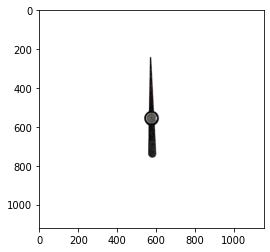

In [17]:
image = Image.open(NEEDLE).convert('RGBA')
image_rot_90 = image.rotate(319, expand=False, resample=Image.BICUBIC)
plt.imshow(image_rot_90)

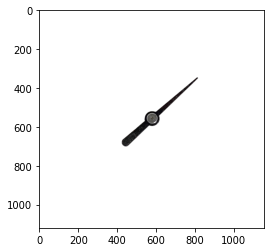

In [18]:
image = Image.open(NEEDLE).convert('RGBA')
image_rot_90 = image.rotate(-90, expand=False, resample=Image.BICUBIC)
plt.imshow(image_rot_90)

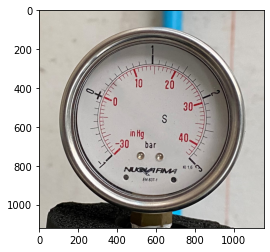

In [19]:
# Gauge background
image = Image.open(GAUGE).convert('RGBA')
plt.imshow(image)

In [22]:
gauge2 = cv.imread(GAUGE)
cv.imshow("gauge", gauge2)
cv.waitKey(0)
cv.destroyAllWindows()

In [33]:
def avg_circles(circles, b):
    avg_x=0
    avg_y=0
    avg_r=0
    for i in range(b):
        #optional - average for multiple circles (can happen when a gauge is at a slight angle)
        avg_x = avg_x + circles[0][i][0]
        avg_y = avg_y + circles[0][i][1]
        avg_r = avg_r + circles[0][i][2]
    avg_x = int(avg_x/(b))
    avg_y = int(avg_y/(b))
    avg_r = int(avg_r/(b))
    return avg_x, avg_y, avg_r

def positioning_degree(x,y,r,img):
  separation= 10 #in degrees
  interval = int(360/separation)
  p1 = np.zeros((interval,2))  #set empty arrays
  p2 = np.zeros((interval,2))
  p_text = np.zeros((interval,2))    

  for i in range(0,interval):
      for j in range(0,2):
          if (j%2==0):
              p1[i][j] = x + 0.9 * r * np.cos(separation * i * np.pi / 180) #point for lines
          else:
              p1[i][j] = y + 0.9 * r * np.sin(separation * i * np.pi / 180)

  text_offset_x = 10
  text_offset_y = 5

  for i in range(0, interval):
      for j in range(0, 2):
          if (j % 2 == 0):
              p2[i][j] = x + r * np.cos(separation * i * np.pi / 180)
              p_text[i][j] = x - text_offset_x + 1.2 * r * np.cos((separation) * (i+9) * np.pi / 180) #point for text labels, i+9 rotates the labels by 90 degrees
          else:
              p2[i][j] = y + r * np.sin(separation * i * np.pi/ 180)
              p_text[i][j] = y + text_offset_y + 1.2* r * np.sin((separation) * (i+9) * np.pi / 180)  # point for text labels, i+9 rotates the labels by 90 degrees

  #add the lines and labels to the image
  for i in range(0,interval):
      cv.line(img, (int(p1[i][0]), int(p1[i][1])), (int(p2[i][0]), int(p2[i][1])),(0, 255, 0), 2)
      cv.putText(img, '%s' %(int(i*separation)), (int(p_text[i][0]), int(p_text[i][1])), cv.FONT_HERSHEY_SIMPLEX, 0.3,(0,0,0),1,cv.LINE_AA)

  cv.imshow("Positioning degree", img)
  cv.waitKey(0)
  cv.destroyAllWindows()

In [23]:
gray = cv.cvtColor(gauge2, cv.COLOR_BGR2GRAY)
cv.imshow("Gray", gray)
cv.waitKey(0)
cv.destroyAllWindows()

In [24]:
width, height = gray.shape[:2]
circle_img= cv.HoughCircles(gray, cv.HOUGH_GRADIENT,1, 20, np.array([]), 100, 50, int(height*0.35), int(height*0.50))
a, b, c = circle_img.shape
circle_img

array([[[582.5, 563.5, 478.5],
        [566.5, 580.5, 424.6],
        [605.5, 548.5, 451. ],
        [564.5, 554.5, 408.1],
        [581.5, 537.5, 422.4],
        [600.5, 597.5, 444.4],
        [605.5, 527.5, 436.7],
        [541.5, 577.5, 436.7],
        [626.5, 572.5, 434.5],
        [536.5, 557.5, 432.3],
        [624.5, 539.5, 430.1],
        [557.5, 528.5, 436.7],
        [606.5, 572.5, 429. ],
        [553.5, 596.5, 438.9],
        [576.5, 517.5, 433.4],
        [577.5, 598.5, 427.9],
        [639.5, 555.5, 441.1],
        [590.5, 616.5, 449.9],
        [612.5, 615.5, 454.2],
        [621.5, 593.5, 424.6],
        [629.5, 632.5, 477.4],
        [626.5, 519.5, 446.6],
        [531.5, 598.5, 451. ],
        [538.5, 536.5, 440. ],
        [608.5, 636.5, 470.8],
        [595.5, 509.5, 441.1],
        [643.5, 531.5, 463.1],
        [652.5, 623.5, 488.4],
        [532.5, 634.5, 477.4],
        [548.5, 617.5, 454.3],
        [555.5, 507.5, 416.9],
        [568.5, 618.5, 448.8],
        

In [25]:
a, b, c = circle_img.shape
a, b, c

(1, 184, 3)

In [26]:
gauge3 = gauge2.copy()
gauge4 = gauge2.copy()
gauge5 = gauge2.copy()

In [31]:
#Averaging out nearby circles incase 
x,y,r = avg_circles(circle_img, b)
cv.circle(gauge3, (x,y), r, (0,255,0), 3)
cv.circle(gauge3, (x,y), 2, (0,255,0), 3)
cv.imshow("Average circle", gauge3)
cv.waitKey()
cv.destroyAllWindows()

In [34]:
positioning_degree(x,y,r,gauge4)

In [35]:
angle_min =48
angle_max = 317
value_min = -1
value_max = 3
value_increment = 0.1 # value between each scale

angle_range = angle_max - angle_min
value_range = value_max - value_min

angle_increment = (angle_range * value_increment)/value_range
angle_increment

6.7250000000000005

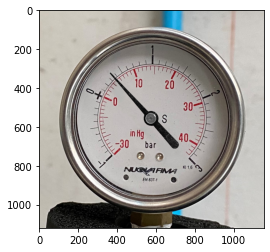

In [36]:
img_gauge = Image.open(GAUGE, 'r')
img_needle = Image.open(NEEDLE).convert('RGBA')
img_copy = img_gauge.copy()

img_copy.paste(img_needle.convert('L'), (0, 0), img_needle.convert('RGBA'))


plt.imshow(img_copy)

In [37]:
def getAngleIncrement(angle_min, angle_max, value_min, value_max, value_increment):
  angle_range = angle_max - angle_min
  value_range = value_max - value_min

  angle_increment = (angle_range * value_increment)/value_range
  return angle_increment

In [38]:
ANGLE_MIN = 48
ANGLE_MAX = 317
VALUE_MIN = -1
VALUE_MAX = 3
VALUE_INCREMENT = 0.1 # value between each scale
getAngleIncrement(angle_min=ANGLE_MIN,
                  angle_max=ANGLE_MAX,
                  value_min=VALUE_MIN,
                  value_max=VALUE_MAX,
                  value_increment=VALUE_INCREMENT)

6.7250000000000005

In [39]:
def getDegreeMapping(min_value, max_value, value_increment, angle_start, angle_min, angle_max):
  # Get angle increment
  angle_range = angle_max - angle_min
  value_range = value_max - value_min

  angle_increment = (angle_range * value_increment)/value_range
  angle_increment = float("{:.2f}".format(angle_increment))
  degree_mapping = {min_value:angle_start}
  # angle_start = 270
  for i in np.arange(min_value+value_increment,max_value+value_increment,value_increment):
    gauge_scale = float("{:.2f}".format(i))
    angle_start += angle_increment
    degree_mapping[gauge_scale] = angle_start
  return degree_mapping

In [40]:
getDegreeMapping(min_value=-1.0,
                 max_value=3.0,
                 value_increment=0.1,
                 angle_start=270,
                 angle_min=48,
                 angle_max=317)

{-1.0: 270,
 -0.9: 276.73,
 -0.8: 283.46000000000004,
 -0.7: 290.19000000000005,
 -0.6: 296.9200000000001,
 -0.5: 303.6500000000001,
 -0.4: 310.3800000000001,
 -0.3: 317.1100000000001,
 -0.2: 323.84000000000015,
 -0.1: 330.57000000000016,
 -0.0: 337.3000000000002,
 0.1: 344.0300000000002,
 0.2: 350.7600000000002,
 0.3: 357.49000000000024,
 0.4: 364.22000000000025,
 0.5: 370.9500000000003,
 0.6: 377.6800000000003,
 0.7: 384.4100000000003,
 0.8: 391.1400000000003,
 0.9: 397.87000000000035,
 1.0: 404.60000000000036,
 1.1: 411.3300000000004,
 1.2: 418.0600000000004,
 1.3: 424.7900000000004,
 1.4: 431.52000000000044,
 1.5: 438.25000000000045,
 1.6: 444.9800000000005,
 1.7: 451.7100000000005,
 1.8: 458.4400000000005,
 1.9: 465.1700000000005,
 2.0: 471.90000000000055,
 2.1: 478.63000000000056,
 2.2: 485.3600000000006,
 2.3: 492.0900000000006,
 2.4: 498.8200000000006,
 2.5: 505.55000000000064,
 2.6: 512.2800000000007,
 2.7: 519.0100000000007,
 2.8: 525.7400000000007,
 2.9: 532.4700000000007,
 

In [41]:
angleList = list(getDegreeMapping(min_value=-1,
                 max_value=3,
                 value_increment=0.1,
                 angle_start=270,
                 angle_min=48,
                 angle_max=317).values())

In [42]:
PATH = "./value_reading/needles/needle_rot_{0}.png"
for angle in angleList:
  angle = float("{:.2f}".format(angle))
  print(PATH.format(angle))

/content/needles/needle_rot_270.0.png
/content/needles/needle_rot_276.73.png
/content/needles/needle_rot_283.46.png
/content/needles/needle_rot_290.19.png
/content/needles/needle_rot_296.92.png
/content/needles/needle_rot_303.65.png
/content/needles/needle_rot_310.38.png
/content/needles/needle_rot_317.11.png
/content/needles/needle_rot_323.84.png
/content/needles/needle_rot_330.57.png
/content/needles/needle_rot_337.3.png
/content/needles/needle_rot_344.03.png
/content/needles/needle_rot_350.76.png
/content/needles/needle_rot_357.49.png
/content/needles/needle_rot_364.22.png
/content/needles/needle_rot_370.95.png
/content/needles/needle_rot_377.68.png
/content/needles/needle_rot_384.41.png
/content/needles/needle_rot_391.14.png
/content/needles/needle_rot_397.87.png
/content/needles/needle_rot_404.6.png
/content/needles/needle_rot_411.33.png
/content/needles/needle_rot_418.06.png
/content/needles/needle_rot_424.79.png
/content/needles/needle_rot_431.52.png
/content/needles/needle_rot_

In [43]:
PATH = "./value_reading/needles/needle_rot_{0}.png"
def make_needles(angle):
  img = Image.open(NEEDLE).convert('RGBA')
  x = img.rotate(-angle, expand=False, resample=Image.BICUBIC)
  
  filename = PATH.format(angle)
  
  x.save(filename)

for angle in angleList:
  angle = float("{:.2f}".format(angle))
  make_needles(angle)

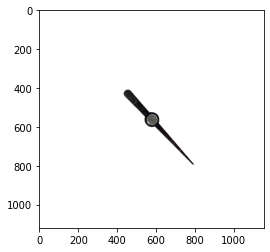

In [45]:
needle1 = Image.open("./value_reading/needles/needle_rot_539.2.png")
plt.imshow(needle1)

In [3]:
# # Folder for storing rotated needle
# os.mkdir("./work/gauge_reader_model/value_reading/needles")

# # for training the model
# os.mkdir("./work/gauge_reader_model/value_reading/tf_gauges")

# # for EDA
# os.mkdir("./work/gauge_reader_model/value_reading/gauges")

In [47]:
# Create the folders for each of the gauge classes
PATH = './work/gauge_reader_model/value_reading/tf_gauges/psi_{0}'

def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

m = range(-1, 3)
n = range(1, 10)
  
for i in np.arange(-1, 3+0.1, 0.1):
  negative_num = float("{:.1f}".format(i))
  createFolder(PATH.format(negative_num))

In [52]:
NEEDLES_PATH = "./value_reading/needles/needle_rot_{0}.png"
TF_GAUGES = "./value_reading/tf_gauges/psi_{0}"
EDA_GAUGES = "./value_reading/gauges/{0}"

def save_gauge(item, num):
    img_gauge = Image.open(GAUGE, 'r')
    item = float("{:.2f}".format(item))

    filename = NEEDLES_PATH.format(item)
    img_needle = Image.open(filename, 'r')
    img_copy = img_gauge.copy()

    img_copy.paste(img_needle.convert('L'), (0,0), img_needle.convert('RGBA'))
    
    # Save the synthetic image to the class folder
    # string_num = str(num)
    # dash = string_num.replace(".","-")
    folder = TF_GAUGES.format(num)

    # Save PNG for data Augmentation
    gauge_name = "{0}/gauge_0.png"
    filename_save = gauge_name.format(folder)
    img_copy.save(filename_save)

    # Save PNG for EDA
    eda_name = "gauge_{0}.png".format(num)
    img_copy.save(EDA_GAUGES.format(eda_name))

def iterate_gauge(mapping):
    for idx, item in enumerate(mapping):
        
        save_gauge(mapping[item], item)

In [51]:
DegreeMap = getDegreeMapping(min_value=-1.0,
                 max_value=3.0,
                 value_increment=0.1,
                 angle_start=270,
                 angle_min=48,
                 angle_max=317)
print(DegreeMap)

{-1.0: 270, -0.9: 276.73, -0.8: 283.46000000000004, -0.7: 290.19000000000005, -0.6: 296.9200000000001, -0.5: 303.6500000000001, -0.4: 310.3800000000001, -0.3: 317.1100000000001, -0.2: 323.84000000000015, -0.1: 330.57000000000016, -0.0: 337.3000000000002, 0.1: 344.0300000000002, 0.2: 350.7600000000002, 0.3: 357.49000000000024, 0.4: 364.22000000000025, 0.5: 370.9500000000003, 0.6: 377.6800000000003, 0.7: 384.4100000000003, 0.8: 391.1400000000003, 0.9: 397.87000000000035, 1.0: 404.60000000000036, 1.1: 411.3300000000004, 1.2: 418.0600000000004, 1.3: 424.7900000000004, 1.4: 431.52000000000044, 1.5: 438.25000000000045, 1.6: 444.9800000000005, 1.7: 451.7100000000005, 1.8: 458.4400000000005, 1.9: 465.1700000000005, 2.0: 471.90000000000055, 2.1: 478.63000000000056, 2.2: 485.3600000000006, 2.3: 492.0900000000006, 2.4: 498.8200000000006, 2.5: 505.55000000000064, 2.6: 512.2800000000007, 2.7: 519.0100000000007, 2.8: 525.7400000000007, 2.9: 532.4700000000007, 3.0: 539.2000000000007}


In [53]:
iterate_gauge(DegreeMap)